In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Libaries imported")


Libaries imported


In [ ]:

df=pd.read_excel('F:/ai-traffic-prediction-backend/data/raw/accident_prediction_india_with_dates.xlsx')
if 'Unnamed: 4' in df.columns:
    df = df.drop(columns=['Unnamed: 4'])

df['datetime']=pd.to_datetime(df['Date']+' '+df['Time of Day'],dayfirst=True,errors='coerce')


print(df.shape)
df.head()

(3000, 23)


,State Name,City Name,Year,Month,Date,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,datetime
0,Jammu and Kashmir,Unknown,2021,May,12/05/2021,1:46,Serious,5,Cycle,0,...,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve,2021-05-12 01:46:00
1,Uttar Pradesh,Lucknow,2018,January,13/01/2018,21:30,Minor,5,Truck,5,...,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road,2018-01-13 21:30:00
2,Chhattisgarh,Unknown,2023,May,11/05/2023,5:37,Minor,5,Pedestrian,6,...,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge,2023-05-11 05:37:00
3,Uttar Pradesh,Lucknow,2020,June,12/06/2020,0:31,Minor,3,Bus,10,...,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road,2020-06-12 00:31:00
4,Sikkim,Unknown,2021,August,28/08/2021,11:21,Minor,5,Cycle,7,...,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection,2021-08-28 11:21:00


State Name                       0
City Name                        0
Year                             0
Month                            0
Date                             0
Time of Day                      0
Accident Severity                0
Number of Vehicles Involved      0
Vehicle Type Involved            0
Number of Casualties             0
Number of Fatalities             0
Weather Conditions               0
Road Type                        0
Road Condition                   0
Lighting Conditions              0
Traffic Control Presence       716
Speed Limit (km/h)               0
Driver Age                       0
Driver Gender                    0
Driver License Status          975
Alcohol Involvement              0
Accident Location Details        0
datetime                         0
dtype: int64


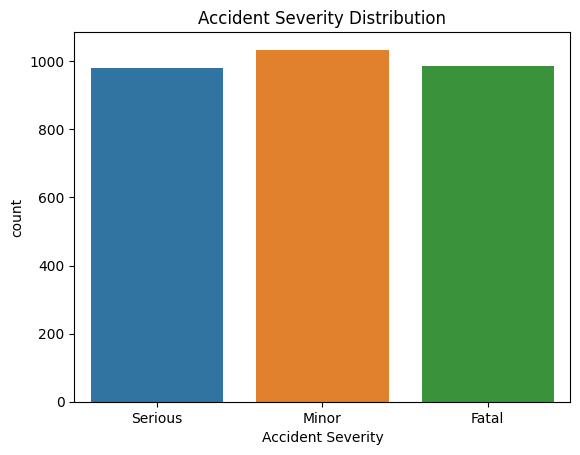

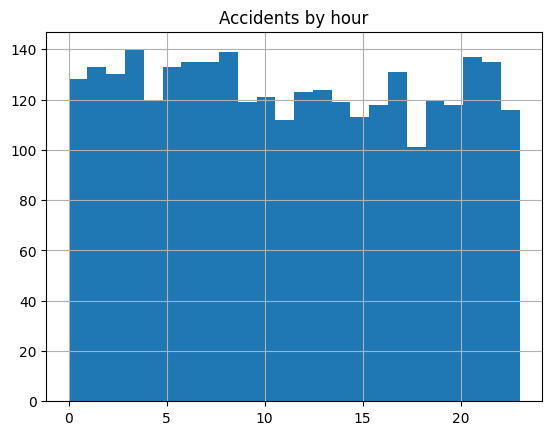

In [ ]:

print(df.isnull().sum())
sns.countplot(x='Accident Severity',data=df)
plt.title('Accident Severity Distribution')
plt.show()

df['hour']=df['datetime'].dt.hour
df['hour'].hist(bins=24)
plt.xlabel('')
plt.title('Accidents by hour')
plt.show()

In [5]:
df['datetime']=pd.to_datetime(df['Date']+' '+df['Time of Day'],dayfirst=True,errors='coerce')

In [6]:
import pandas as pd
import os

def load_and_clean(path:str)->pd.DataFrame:
    df=pd.read_excel(path)
    #drop columns with >90% missing
    thresh=len(df)*0.1
    df['datetime']=pd.to_datetime(df['Date']+' '+df['Time of Day'],dayfirst=True,errors='coerce')
    df=df.dropna(axis=1,thresh=thresh)
    df=df.drop(columns=['Date','Time of Day'])
    if df['Driver License Status'].isnull().sum()>0:
        most_frequent_licence=df['Driver License Status'].mode()[0]
        df['Driver License Status']=df['Driver License Status'].fillna(most_frequent_licence)
        print(f"Filled 'Driver License Status'misiing values with :{most_frequent_licence}")
    if df['Traffic Control Presence'].isnull().sum()>0:
        most_frequent_traffic=df['Traffic Control Presence'].mode()[0]
        df['Traffic Control Presence']=df['Traffic Control Presence'].fillna(most_frequent_traffic)
        print(f"Filled 'Traffic Control Presence'missing values with:{most_frequent_traffic}")
    return df
df=load_and_clean('F:/ai-traffic-prediction-backend/data/raw/accident_prediction_india_with_dates.xlsx')
os.makedirs('data/processed', exist_ok=True)
df.to_csv('data/processed/cleaned_data.csv',index=False)




Filled 'Driver License Status'misiing values with :Valid
Filled 'Traffic Control Presence'missing values with:Signs


In [7]:
df

,State Name,City Name,Year,Month,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,Number of Fatalities,Weather Conditions,...,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,datetime
0,Jammu and Kashmir,Unknown,2021,May,Serious,5,Cycle,0,4,Hazy,...,Wet,Dark,Signs,61,66,Male,Valid,Yes,Curve,2021-05-12 01:46:00
1,Uttar Pradesh,Lucknow,2018,January,Minor,5,Truck,5,4,Hazy,...,Dry,Dusk,Signs,92,60,Male,Valid,Yes,Straight Road,2018-01-13 21:30:00
2,Chhattisgarh,Unknown,2023,May,Minor,5,Pedestrian,6,5,Foggy,...,Under Construction,Dawn,Signs,120,26,Female,Valid,No,Bridge,2023-05-11 05:37:00
3,Uttar Pradesh,Lucknow,2020,June,Minor,3,Bus,10,5,Rainy,...,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road,2020-06-12 00:31:00
4,Sikkim,Unknown,2021,August,Minor,5,Cycle,7,1,Foggy,...,Wet,Dusk,Signs,115,30,Male,Valid,No,Intersection,2021-08-28 11:21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Tamil Nadu,Chennai,2021,January,Minor,5,Truck,4,3,Foggy,...,Wet,Dark,Signs,74,43,Male,Expired,Yes,Intersection,2021-01-05 01:15:00
2996,Uttarakhand,Unknown,2018,July,Fatal,3,Car,3,0,Hazy,...,Under Construction,Daylight,Signs,86,23,Female,Valid,Yes,Intersection,2018-07-03 10:12:00
2997,Meghalaya,Unknown,2021,January,Minor,2,Two-Wheeler,8,5,Rainy,...,Dry,Dark,Signs,47,57,Female,Valid,Yes,Intersection,2021-01-08 19:34:00
2998,Meghalaya,Unknown,2023,June,Fatal,1,Cycle,9,2,Stormy,...,Under Construction,Daylight,Signs,60,28,Female,Expired,Yes,Bridge,2023-06-01 20:54:00


In [8]:
!pip install openpyxl

In [9]:
df

,State Name,City Name,Year,Month,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,Number of Fatalities,Weather Conditions,...,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,datetime
0,Jammu and Kashmir,Unknown,2021,May,Serious,5,Cycle,0,4,Hazy,...,Wet,Dark,Signs,61,66,Male,Valid,Yes,Curve,2021-05-12 01:46:00
1,Uttar Pradesh,Lucknow,2018,January,Minor,5,Truck,5,4,Hazy,...,Dry,Dusk,Signs,92,60,Male,Valid,Yes,Straight Road,2018-01-13 21:30:00
2,Chhattisgarh,Unknown,2023,May,Minor,5,Pedestrian,6,5,Foggy,...,Under Construction,Dawn,Signs,120,26,Female,Valid,No,Bridge,2023-05-11 05:37:00
3,Uttar Pradesh,Lucknow,2020,June,Minor,3,Bus,10,5,Rainy,...,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road,2020-06-12 00:31:00
4,Sikkim,Unknown,2021,August,Minor,5,Cycle,7,1,Foggy,...,Wet,Dusk,Signs,115,30,Male,Valid,No,Intersection,2021-08-28 11:21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Tamil Nadu,Chennai,2021,January,Minor,5,Truck,4,3,Foggy,...,Wet,Dark,Signs,74,43,Male,Expired,Yes,Intersection,2021-01-05 01:15:00
2996,Uttarakhand,Unknown,2018,July,Fatal,3,Car,3,0,Hazy,...,Under Construction,Daylight,Signs,86,23,Female,Valid,Yes,Intersection,2018-07-03 10:12:00
2997,Meghalaya,Unknown,2021,January,Minor,2,Two-Wheeler,8,5,Rainy,...,Dry,Dark,Signs,47,57,Female,Valid,Yes,Intersection,2021-01-08 19:34:00
2998,Meghalaya,Unknown,2023,June,Fatal,1,Cycle,9,2,Stormy,...,Under Construction,Daylight,Signs,60,28,Female,Expired,Yes,Bridge,2023-06-01 20:54:00
